<a href="https://colab.research.google.com/github/seenu-g/gen-AI/blob/main/experiments/audio_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers
!pip install transformers[sentencepiece]
!pip install datasets
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install librosa


In [ ]:
from datasets import load_dataset

In [ ]:
from datasets import Audio

minds = load_dataset("PolyAI/minds14", "fr-FR")
print(minds)

audio_input = minds["train"][0]["audio"]  # first decoded audio sample
intent_class = minds["train"][0]["intent_class"]  # first transcription
intent = minds["train"].features["intent_class"].names[intent_class]

minds["train"][0]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 539
    })
})


{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_4.wav',
  'array': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.00048828, -0.00024414]),
  'sampling_rate': 8000},
 'transcription': 'je souhaite changer mon adresse',
 'english_transcription': 'I want to change my address',
 'intent_class': 1,
 'lang_id': 6}

In [ ]:
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
# does not change the audio in-place, but rather signals to datasets to resample the audio examples on the fly when they are loaded.
minds["train"][0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_4.wav',
  'array': array([ 6.73558679e-06,  1.75378518e-05, -6.78066863e-06, ...,
          1.39400683e-04, -2.29061290e-04, -2.45869014e-04]),
  'sampling_rate': 16000},
 'transcription': 'je souhaite changer mon adresse',
 'english_transcription': 'I want to change my address',
 'intent_class': 1,
 'lang_id': 6}

In [ ]:
import librosa

MAX_DURATION_IN_SECONDS = 20.0
# You may need to filter the data based on some criteria, say limiting the audio examples to a certain duration.
def get_duration(file_path):
   audio_data, sample_rate = librosa.load(file_path)
   duration = librosa.get_duration(y=audio_data, sr=sample_rate)
   return duration

def is_audio_length_in_range(input_length):
    return input_length < MAX_DURATION_IN_SECONDS

In [ ]:
sample = minds["train"][0]
sample['path']
get_duration(sample['path'])

3.7546485260770974

In [ ]:
for x in minds["train"] :
  audio_duration = get_duration(x['path'])
  if(is_audio_length_in_range(audio_duration)):
     print(audio_duration,x['path'])

3.7546485260770974 /root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_4.wav
4.778639455782313 /root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_17.wav
14.677414965986394 /root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_16.wav
3.5840362811791384 /root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_5.wav
3.3280272108843536 /root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_14.wav
4.010657596371882 /root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/fr-FR~ADDRESS/response_28.

In [ ]:
from transformers import WhisperFeatureExtractor
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")
# ransformers offer a feature extractor class that can convert raw audio data into the input features the model expects.

In [ ]:
# pre-process a single audio example by passing it through the feature_extractor.
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"], padding=True
    )
    return features

In [ ]:
# apply the data preparation function to all of our training examples
minds = minds.map(prepare_dataset)
minds

Map:   0%|          | 0/539 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id', 'input_features'],
        num_rows: 539
    })
})

In [ ]:
pip install matplotlib


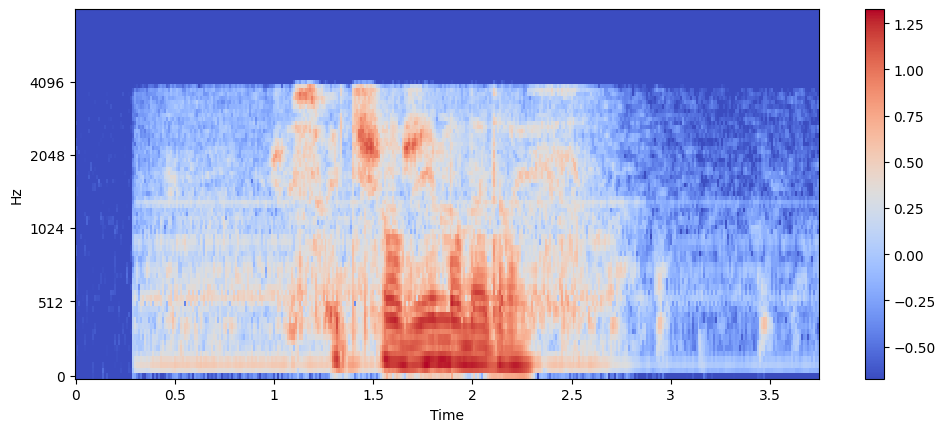

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

example = minds["train"][0]
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length,
)
plt.colorbar()

In [ ]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
from transformers import pipeline
# o classify an audio recording into a set of classes, we can use the audio-classification pipeline from 🤗 Transformers
classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
)

In [ ]:
example = minds[0]
print(classifier(example["audio"]["array"]))
print ("\n")
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

[{'score': 0.962530791759491, 'label': 'pay_bill'}, {'score': 0.028672993183135986, 'label': 'freeze'}, {'score': 0.0033498124685138464, 'label': 'card_issues'}, {'score': 0.0020058127120137215, 'label': 'abroad'}, {'score': 0.0008484353311359882, 'label': 'high_value_payment'}]




'pay_bill'